In [11]:
%matplotlib inline

# Import useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Import the data
infile = "processed_data/RVT_TracerTest_GasConcentrations.txt"
df = pd.read_csv(infile, sep='\t')

# Remove atmospheric samples and headspace equil samples (for now)
atmos = df[df.Location == 'Atmosphere']
df = df[df.Location != 'Atmosphere']
df = df[df.Method != 'H']

# Fill CH4 NaN values with 0, since they're below detection limit
# df['CH4_conc'] = df['CH4_conc'].fillna(0.001) 

print(atmos)

     SampleID    Location  Depth        Date Method    Dup  N2O_conc  N2O_bdl  \
4          15  Atmosphere    0.0  2019-07-29      G  False  0.050500     True   
57         52  Atmosphere    0.0  2019-06-24      G  False  0.306047    False   
58         17  Atmosphere    0.0  2019-07-01      H  False  0.305353    False   
103        28  Atmosphere    0.0  2019-05-24      G  False  0.050500     True   
104        87  Atmosphere    0.0  2019-06-17      G  False  0.050500     True   
162        40  Atmosphere    0.0  2019-05-16      G  False  0.050500     True   
222        28  Atmosphere    0.0  2019-03-27      G  False  0.180000     True   
223        29  Atmosphere    0.0  2019-04-23      G  False  0.180000     True   

     CO2_conc CO2_bdl  CH4_conc CH4_bdl  
4       200.0    True       1.0    True  
57      250.0    True       5.0    True  
58      250.0    True       5.0    True  
103     200.0    True       1.0    True  
104     200.0    True       1.0    True  
162     200.0    T

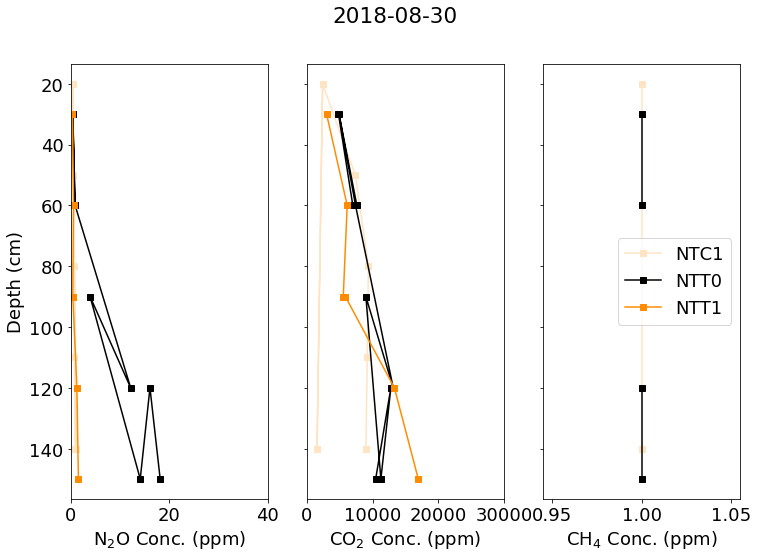

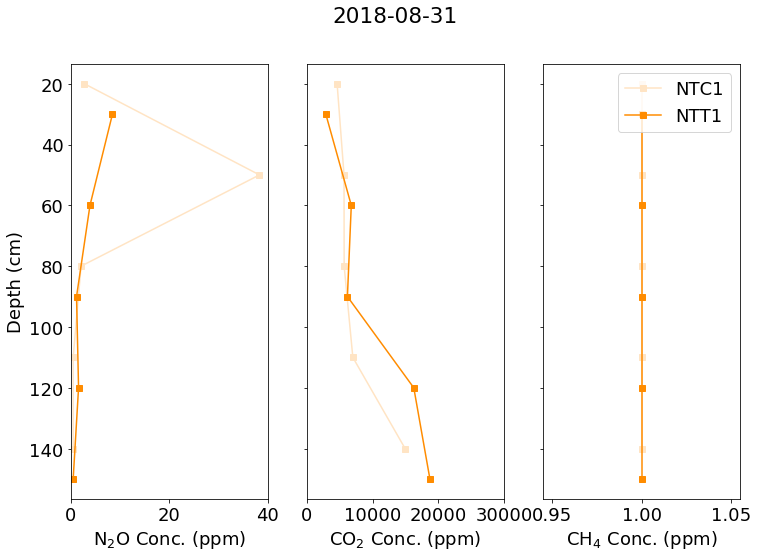

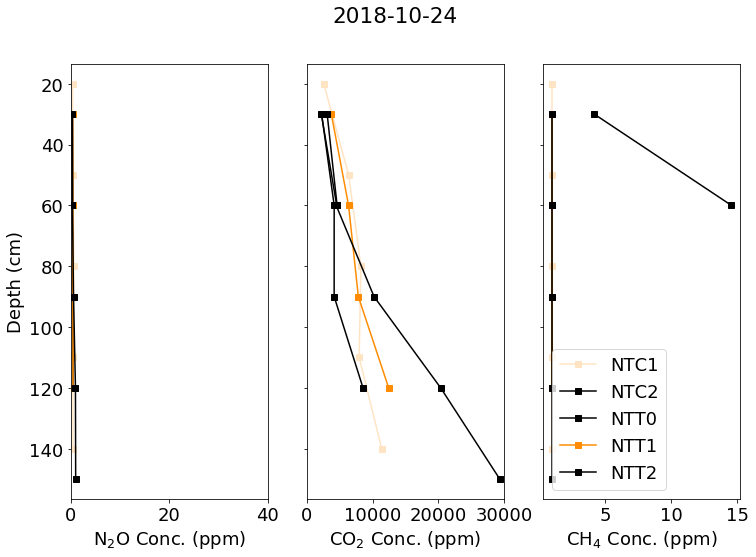

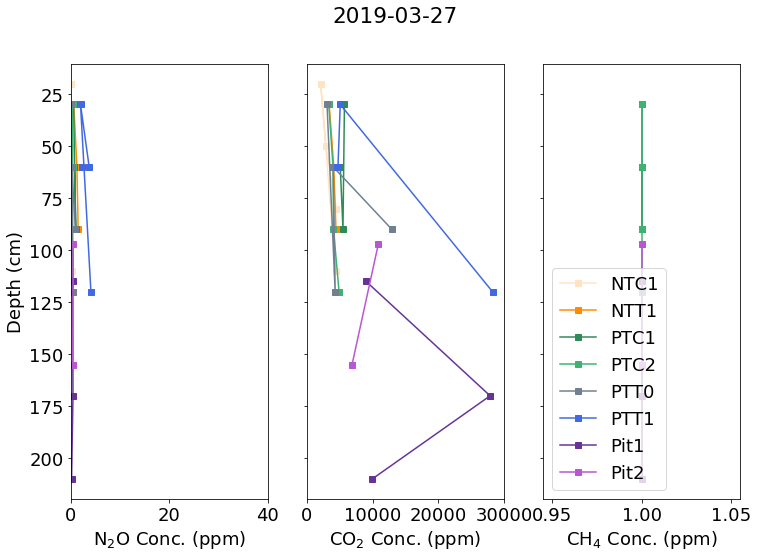

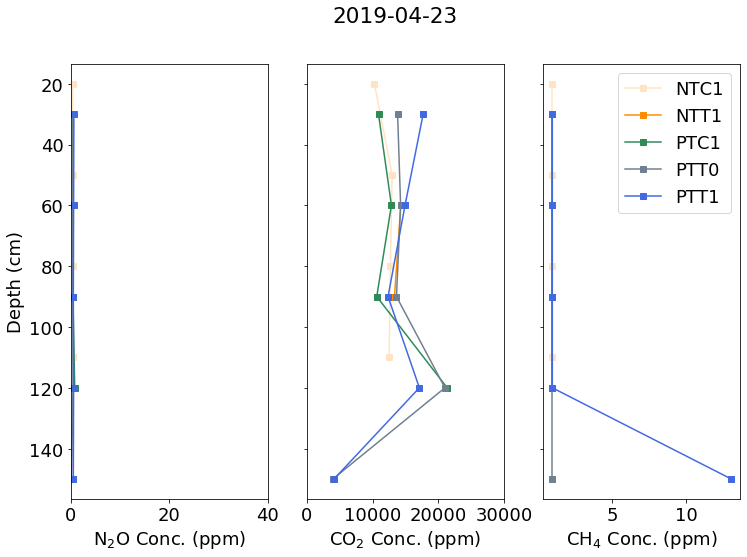

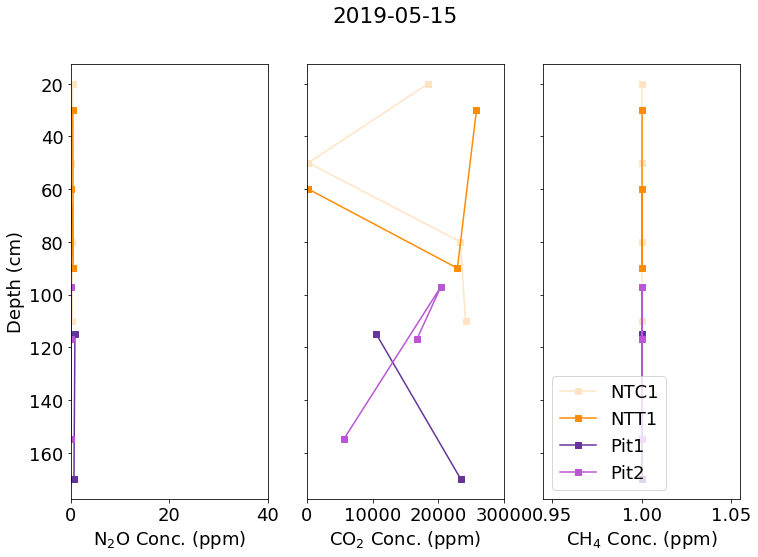

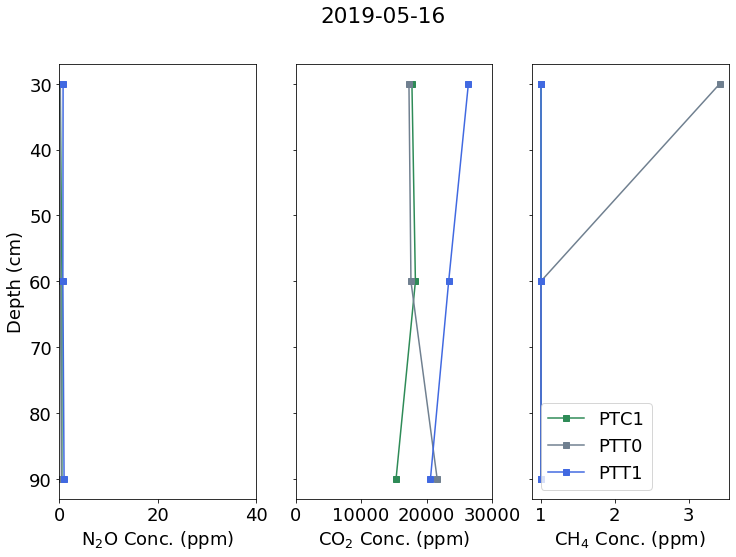

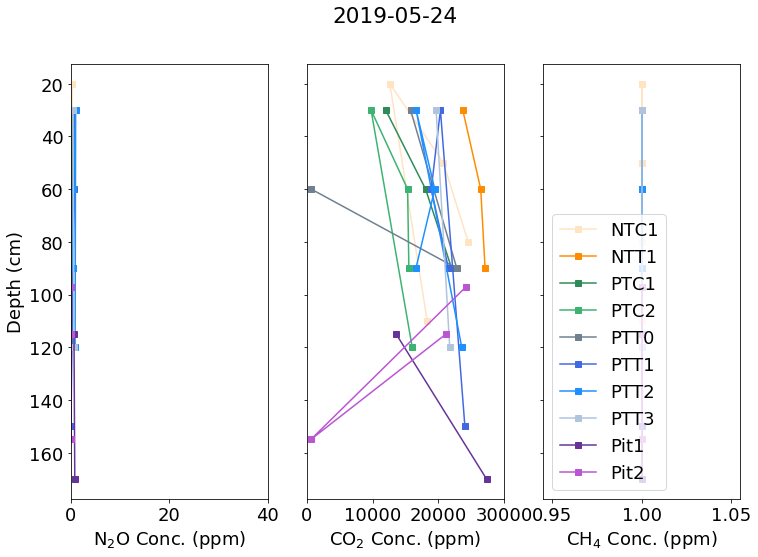

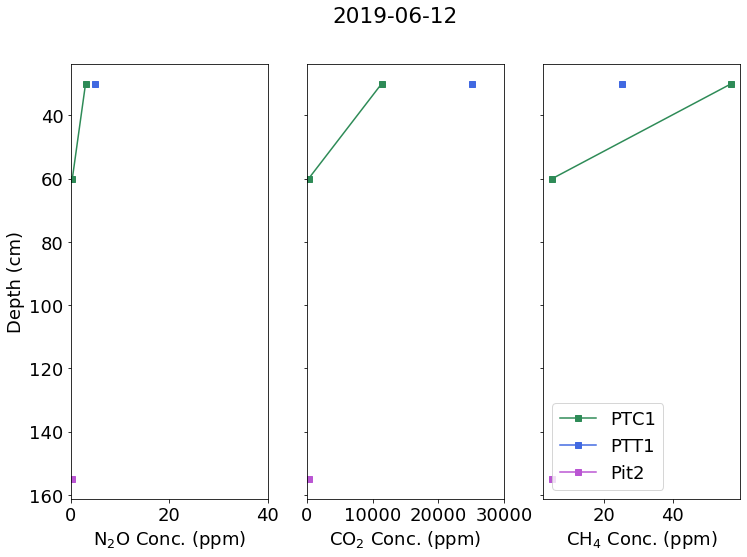

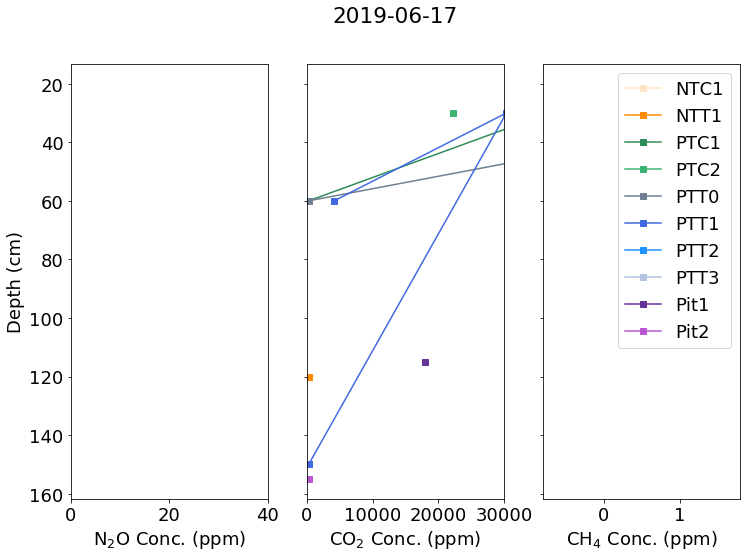

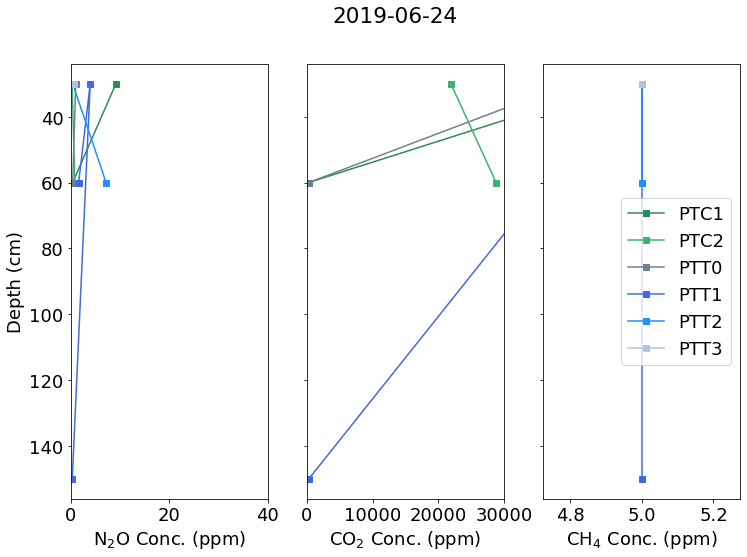

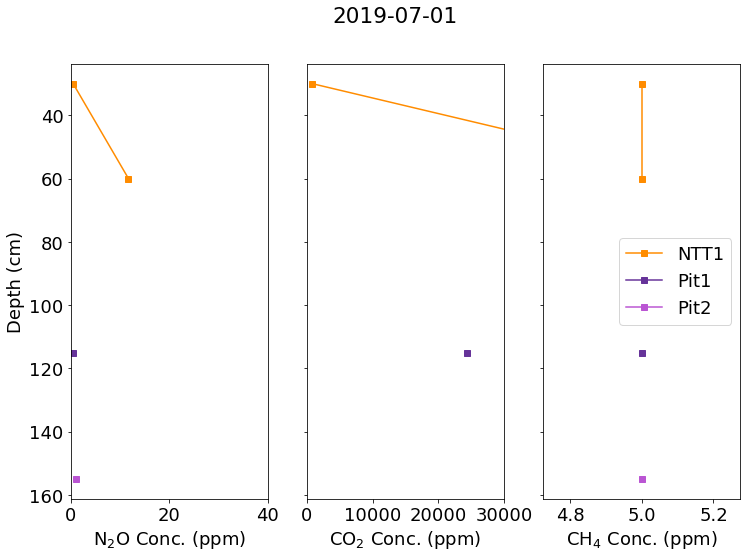

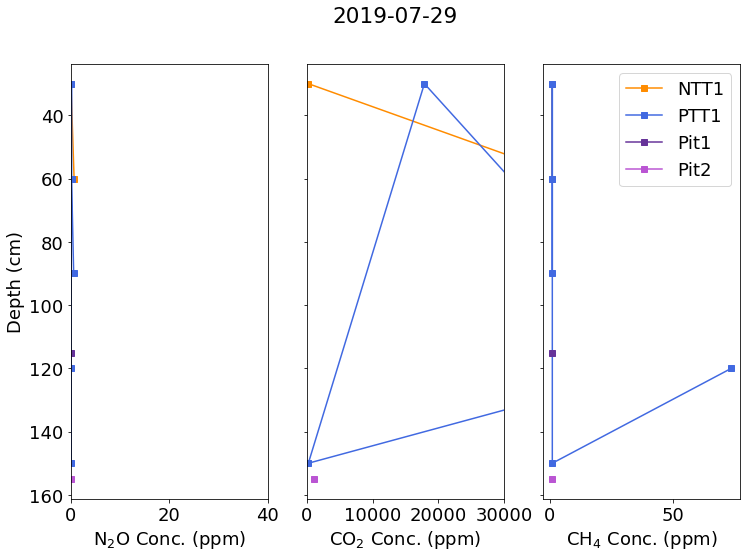

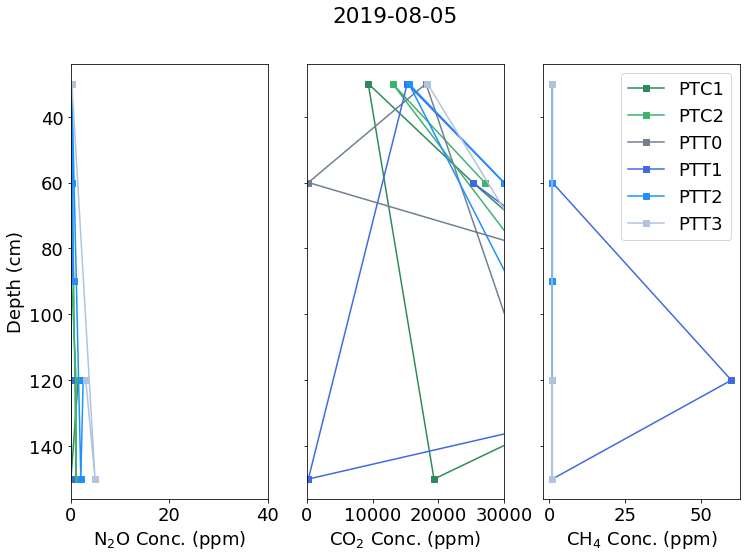

In [12]:

# Define a dictionary of colors for each location
# Necessary to maintain consistent coloring from one plot to the next
colors = {"PTT0": "slategrey",
          "PTT1": "royalblue",
          "PTT2": "dodgerblue",
          "PTT3": "lightsteelblue",
          "PTC1": "seagreen",
          "PTC2": "mediumseagreen",
          "Pit1": "rebeccapurple",
          "Pit2": "mediumorchid",
          "NTT1": "darkorange",
          "NTC1": "bisque",
          "NTT2": "k",
          "NTC2": "k",
          "NTT0": "k"}

# Set font size for all plots
matplotlib.rcParams.update({'font.size': 18})

# Create a separate plot for each unique sampling date
sampl_dates = np.unique(df['Date'].tolist())
i = 1  # Figure counter
for day in sampl_dates:
    today = df[df['Date'] == day]
    # Get a list of unique locations for that date
    sampl_site = np.unique(today['Location'].tolist())
    # Create a plot with two subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, num=i, sharey=True, figsize=(12,8))
    plt.suptitle(day)

    # Plot each location as a separate series
    for site in sampl_site:
        d = today[today['Location'] == site]['Depth']
        c = today[today['Location'] == site]['CO2_conc']
        n = today[today['Location'] == site]['N2O_conc']
        h = today[today['Location'] == site]['CH4_conc']
        ax1.plot(n, d, colors[site], linestyle='-', marker='s', label=site)
        ax2.plot(c, d, colors[site], linestyle='-', marker='s', label=site)
        ax3.plot(h, d, colors[site], linestyle='-', marker='s', label=site)
        
    # Format each subplot
    plt.gca().invert_yaxis()
    ax1.set(xlabel=r'N$_2$O Conc. (ppm)', ylabel='Depth (cm)', xlim=(0, 40))
    ax2.set(xlim=(0, 30000), xlabel=r'CO$_2$ Conc. (ppm)')
    ax3.set(xlabel=r'CH$_4$ Conc. (ppm)')
    plt.legend(loc='best')
    savefile = "plots/NTGasProfiles_" + day.replace('-', '') + ".png"
    plt.savefig(savefile)
    i += 1
